<font size=5>This research project is conducted and completed by SIN Chun Hung, a mathematician from The Hong Kong University of Science and Technology. 

# Analyzing responses from the Video Game Sales records

In this project,we will analyze the dataset which contains list of video game sales generated by [vgchartz](https://www.vgchartz.com).The tools such as pandas,matplotlib,seaborn will be used here to do data visualization and hence make further analysis on the data in different perspective(genre,platform,publisher..etc).

## Downloading the Dataset

From the website kaggle,'Video Game sales' is worth investigating.It is recommended to download the csv file using opendatasets Python library.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/gregorut/videogamesales' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in ".\videogamesales" (use force=True to force download)


The dataset has been downloaded and extracted.

In [4]:
data_dir = './videogamesales'

In [5]:
import os
os.listdir(data_dir)

['vgsales.csv']

## Data Preparation and Cleaning
While the dataframe contains lots of information,this project will simply do the investigation on all the video games which 
* On sales from 2005 as all the human are transfered from Generation Z to Generation Alpha.More meaningful to analyze the 
  year near 2021.
  
* Number of sales in the global perspective.More meaningful to analyze as a member and duty in this global society.

In [6]:
import pandas as pd

In [7]:
# using Pandas to load the videogamesale csv file
video_game_sales = pd.read_csv('videogamesales/vgsales.csv' )

In [8]:
# Show the data frame
video_game_sales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [9]:
# Store the column needed in a list
column_want = ['Rank','Name','Platform','Year','Genre','Publisher','Global_Sales']

In [10]:
# Using slice notation [video game year greater than or equal to 2005] and [column_want] to select
# the columns want for further analysis
video_game_sales_modified = video_game_sales[video_game_sales.Year >= 2005][column_want].copy()

In [11]:
video_game_sales_modified

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,29.02
...,...,...,...,...,...,...,...
16589,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016.0,Action,dramatic create,0.01
16590,16593,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,Falcom Corporation,0.01
16592,16595,Plushees,DS,2008.0,Simulation,Destineer,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.01


In [12]:
# 11155 records/rows and 7 columns
video_game_sales_modified.shape

(11155, 7)

In [13]:
# this line show the class type which is dataframe with 11155 records and 7 columns
# number of 3 numerical columns and 4 object type column
video_game_sales_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11155 entries, 0 to 16596
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          11155 non-null  int64  
 1   Name          11155 non-null  object 
 2   Platform      11155 non-null  object 
 3   Year          11155 non-null  float64
 4   Genre         11155 non-null  object 
 5   Publisher     11138 non-null  object 
 6   Global_Sales  11155 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 697.2+ KB


It seems that most of the types of columns match correctly as expected. The only thing is to transform datatype of Year from 
float64 into int64.

In [14]:
# using astype function to do transformation.
video_game_sales_modified['Year'] = video_game_sales_modified['Year'].astype('int64')

In [15]:
video_game_sales_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11155 entries, 0 to 16596
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          11155 non-null  int64  
 1   Name          11155 non-null  object 
 2   Platform      11155 non-null  object 
 3   Year          11155 non-null  int64  
 4   Genre         11155 non-null  object 
 5   Publisher     11138 non-null  object 
 6   Global_Sales  11155 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 697.2+ KB


In [16]:
# randomly take 20 of the reocrds from dataframe
video_game_sales_modified.sample(20)

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
5859,5861,24: The Game,PS2,2006,Adventure,Sony Computer Entertainment,0.30
16417,16420,th!nk Logic Trainer,Wii,2009,Puzzle,Conspiracy Entertainment,0.01
7062,7064,Family Fest presents: Movie Games,Wii,2008,Action,Ubisoft,0.23
7074,7076,The Idolm@ster SP: Wandering Star / Perfect Su...,PSP,2009,Adventure,Namco Bandai Games,0.23
1982,1984,Forza Motorsport,XB,2005,Racing,Microsoft Game Studios,1.05
14173,14175,Original Story from Fairy Tail: Gekitotsu! Kar...,DS,2011,Role-Playing,Hudson Soft,0.03
2518,2520,DmC: Devil May Cry,PS3,2013,Action,Capcom,0.82
2792,2794,Star Ocean: The Last Hope International,PS3,2010,Role-Playing,Square Enix,0.73
1016,1018,Portal 2,PS3,2011,Shooter,Valve,1.74
15037,15040,Major Dream: Major DS Dream Baseball,DS,2008,Sports,Takara Tomy,0.02


## Exploratory Analysis and Visualization
After the data preprocessing and cleaning,it is very essential and helpful to explore the data in several perspective generally.They are competition among publisher , platform used by players and popularity of genre.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [17]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Competition among publishers
To find out which publishers have higher competitive ability,it is crucial to implement the following and select the top 10 
publishers among the video game community.


In [18]:
# show the dataframe containing two columns 
competition_publisher = video_game_sales_modified[['Publisher' , 'Global_Sales']]
# Using groupby function,Publisher as the parameter within it,grouping distinct publishers.Then use slice notation 
# to focus on the corresponding global sales,summing and sorting.
# finally choose 10 top data.
competition_publisher_top = competition_publisher.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending = False).head(10)
competition_publisher_top

Publisher
Nintendo                       958.43
Electronic Arts                727.99
Activision                     557.48
Ubisoft                        406.95
Take-Two Interactive           308.02
Sony Computer Entertainment    285.24
THQ                            197.67
Microsoft Game Studios         196.53
Sega                           175.37
Namco Bandai Games             157.82
Name: Global_Sales, dtype: float64

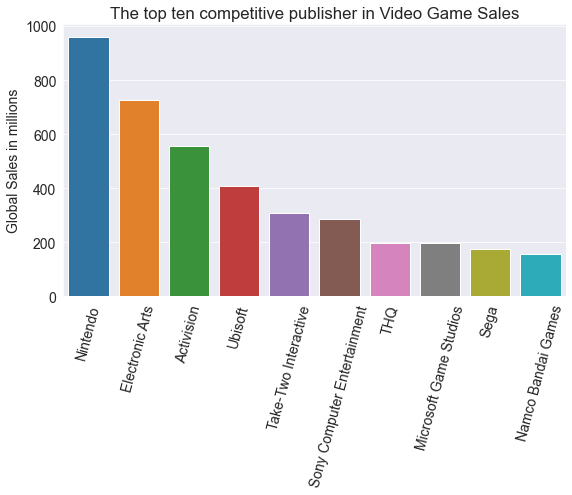

In [19]:
plt.title("The top ten competitive publisher in Video Game Sales")
sns.barplot(x = competition_publisher_top.index , y=competition_publisher_top)
plt.xticks(rotation =75)
plt.xlabel(None)
plt.ylabel('Global Sales in millions');

In [20]:
video_game_sales_modified.Year.sort_values(ascending = False).head(10)

5957     2020
16241    2017
16438    2017
14390    2017
8860     2016
14610    2016
16431    2016
12591    2016
4820     2016
7575     2016
Name: Year, dtype: int64

It appears that the most competitive company is Nintendo ,rank second is Electronic Arts and the third is Activision.They sold around 900 millions ,700 millions and 500 millions respectively during 2005 - 2020. 

# Platform used by players
To find out what the number of customer having the platform and buying the game.It is reasonable to invest the relationship between platform and number of sales.

In [21]:
# Extract the two column 
Platform_used = video_game_sales_modified[['Platform','Global_Sales']]
Platform_used

,Platform,Global_Sales
0,Wii,82.74
2,Wii,35.82
3,Wii,33.00
6,DS,30.01
7,Wii,29.02
...,...,...
16589,PSV,0.01
16590,PSP,0.01
16592,DS,0.01
16595,PS2,0.01


In [22]:
# Group all same category of platform and sum the corresponding number sales among globe.
Platform_used_number = Platform_used.groupby('Platform')['Global_Sales'].sum().sort_values(ascending = False ).head(10)
Platform_used_number

Platform
X360    969.61
PS3     949.35
Wii     909.81
DS      801.48
PS2     426.45
PSP     284.58
PS4     278.10
3DS     246.28
PC      166.80
XOne    141.06
Name: Global_Sales, dtype: float64

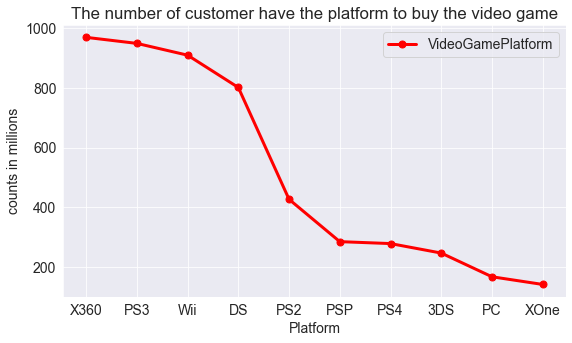

In [23]:
# to visualize the result
plt.title('The number of customer have the platform to buy the video game')
plt.plot(Platform_used_number,marker = 'o', c = 'r' , lw= 3 , ms=7)
plt.xlabel('Platform')
plt.ylabel('counts in millions')
plt.legend(['VideoGamePlatform']);

From the chart plotted above,it is easy to see that XBox360 , PS3 and Wii (rank 1st , 2nd ,3rd respectively) are the platform that the most number of customer having.The three platform are closely related to the sales number and three of them are all above and around 900 millions of sales.

# Popularity of genre
This part of project illustrate that what is the most popular type of game among the customers.It is closely associate with number of sales.Therefore,the below will show this relationship. 

In [24]:
genre_sales = video_game_sales_modified[['Genre','Global_Sales']]
genre_sales

,Genre,Global_Sales
0,Sports,82.74
2,Racing,35.82
3,Sports,33.00
6,Platform,30.01
7,Misc,29.02
...,...,...
16589,Action,0.01
16590,Role-Playing,0.01
16592,Simulation,0.01
16595,Racing,0.01


In [25]:
genre_popular = genre_sales.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(10)
genre_popular

Genre
Action          1208.02
Sports           852.56
Shooter          743.21
Misc             622.88
Role-Playing     543.62
Racing           358.22
Platform         306.43
Simulation       271.81
Fighting         209.49
Adventure        151.22
Name: Global_Sales, dtype: float64

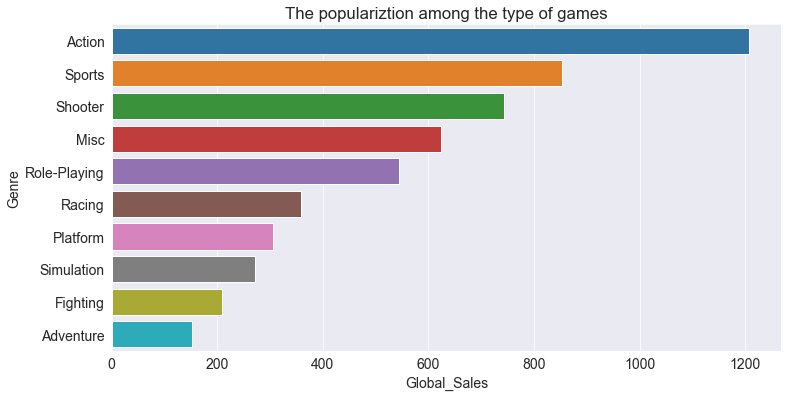

In [26]:
# Visualize the data ,plot the chart horizontally
plt.figure(figsize = (12,6))
plt.title('The populariztion among the type of games')
sns.barplot(x=genre_popular, y=genre_popular.index);

As we expected,the highest sales number is Action game.It can be deducted that action game is the most favourite among the customers.Second is Sports type game.The third is Shooter game like Left4Dead etc.The number of sales are near 1.2 billions ,
850 millions and 700 millions respectively.

## Asking and Answering Questions

We have gained several insights on publishers,platforms and genres in the video game community.Let's try to ask some questions and answer them.



#### Q1: Which publisher dominates in action type game over the years? 

In [27]:
# need three column for the requirement
genre_publisher_globalsales = video_game_sales_modified[['Genre','Publisher','Global_Sales']]
genre_publisher_globalsales

,Genre,Publisher,Global_Sales
0,Sports,Nintendo,82.74
2,Racing,Nintendo,35.82
3,Sports,Nintendo,33.00
6,Platform,Nintendo,30.01
7,Misc,Nintendo,29.02
...,...,...,...
16589,Action,dramatic create,0.01
16590,Role-Playing,Falcom Corporation,0.01
16592,Simulation,Destineer,0.01
16595,Racing,Activision,0.01


In [28]:
action_publisher_globalsales = genre_publisher_globalsales[genre_publisher_globalsales.Genre == 'Action']
action_publisher_globalsales

,Genre,Publisher,Global_Sales
16,Action,Take-Two Interactive,21.40
23,Action,Take-Two Interactive,16.38
44,Action,Take-Two Interactive,11.98
45,Action,Nintendo,11.90
51,Action,Take-Two Interactive,11.02
...,...,...,...
16548,Action,Idea Factory,0.01
16550,Action,Namco Bandai Games,0.01
16564,Action,"Destination Software, Inc",0.01
16567,Action,Namco Bandai Games,0.01


In [29]:
top_ten_publisher_actiongame = action_publisher_globalsales[['Publisher','Global_Sales']].groupby('Publisher')['Global_Sales'].sum().sort_values(ascending = False).head(10)
top_ten_publisher_actiongame

Publisher
Take-Two Interactive                      144.17
Ubisoft                                   124.02
Warner Bros. Interactive Entertainment    106.69
Activision                                100.83
Sony Computer Entertainment                78.26
Electronic Arts                            77.42
Nintendo                                   66.39
LucasArts                                  57.56
Capcom                                     57.24
THQ                                        53.81
Name: Global_Sales, dtype: float64

In [30]:
# Presenting the top ten Publisher in percentage and use pie chart for visualization.
# the base = 10 data summation from above ,  is used as the percentage calculation.

top_ten_publisher_actiongame_percentage = (top_ten_publisher_actiongame / top_ten_publisher_actiongame.sum()) * 100
top_ten_publisher_actiongame_percentage

Publisher
Take-Two Interactive                      16.640312
Ubisoft                                   14.314570
Warner Bros. Interactive Entertainment    12.314316
Activision                                11.637946
Sony Computer Entertainment                9.032884
Electronic Arts                            8.935930
Nintendo                                   7.662831
LucasArts                                  6.643659
Capcom                                     6.606724
THQ                                        6.210829
Name: Global_Sales, dtype: float64

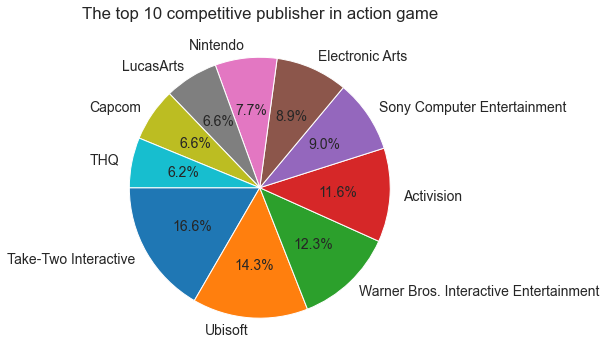

In [31]:
plt.figure(figsize = (12,6))
plt.title('The top 10 competitive publisher in action game')
plt.pie(top_ten_publisher_actiongame_percentage, labels = top_ten_publisher_actiongame_percentage.index , autopct = '%1.1f%%' , startangle = 180);

From the pie chart plot above,it is easy to see the Take-Two Interactive take the largest proportion of the pie chart,about 16.6% out of 100%. The second largest is Ubisoft,with 14.3% proportion of graph.The third is Warner Bros.Interactive Entertainment, about 12.3% of graph.
We can say that the Take-Two Interactive is the most competitive in action game over 2005~2020.

#### Q2: Which platform is the most popular in recent years? i.e. between 2016 - 2020

In [32]:
# Pick the years 2016-2020
pick_year = video_game_sales_modified[video_game_sales_modified.Year >= 2016]
pick_year

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
221,222,FIFA 17,PS4,2016,Sports,Electronic Arts,4.77
271,272,Uncharted 4: A Thief's End,PS4,2016,Shooter,Sony Computer Entertainment,4.20
351,352,Tom Clancy's The Division,PS4,2016,Shooter,Ubisoft,3.61
770,772,Far Cry: Primal,PS4,2016,Action,Ubisoft,2.13
845,847,Tom Clancy's The Division,XOne,2016,Shooter,Ubisoft,2.01
...,...,...,...,...,...,...,...
16562,16565,Mighty No. 9,XOne,2016,Platform,Deep Silver,0.01
16569,16572,Resident Evil 4 HD,XOne,2016,Shooter,Capcom,0.01
16570,16573,Farming 2017 - The Simulation,PS4,2016,Simulation,UIG Entertainment,0.01
16576,16579,Rugby Challenge 3,XOne,2016,Sports,Alternative Software,0.01


In [33]:
# Pick Platform and global sales
platform_globalsales_in_years =pick_year[['Platform','Global_Sales']]
platform_globalsales_in_years

,Platform,Global_Sales
221,PS4,4.77
271,PS4,4.20
351,PS4,3.61
770,PS4,2.13
845,XOne,2.01
...,...,...
16562,XOne,0.01
16569,XOne,0.01
16570,PS4,0.01
16576,XOne,0.01


In [34]:
# Group platform and investigate the global sales each
popular_platform_in_years = platform_globalsales_in_years.groupby('Platform')['Global_Sales'].sum().sort_values(ascending = False).head(10)
popular_platform_in_years

Platform
PS4     39.28
XOne    12.37
3DS      6.60
PSV      3.42
WiiU     3.29
PC       2.60
PS3      2.59
X360     0.83
DS       0.29
Name: Global_Sales, dtype: float64

In [35]:
# do this in percentage, the base just like the pie chart previous example
popular_platform_in_years_percentage = (popular_platform_in_years/popular_platform_in_years.sum())*100
popular_platform_in_years_percentage

Platform
PS4     55.114354
XOne    17.356531
3DS      9.260558
PSV      4.798653
WiiU     4.616248
PC       3.648099
PS3      3.634068
X360     1.164585
DS       0.406903
Name: Global_Sales, dtype: float64

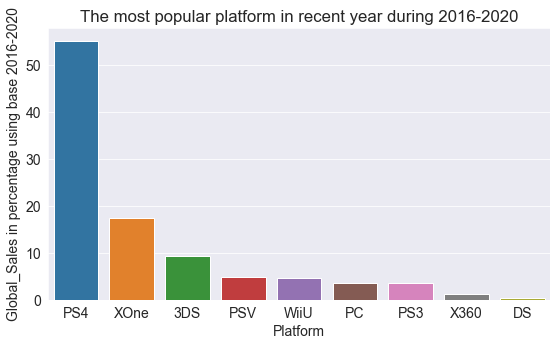

In [36]:
# Visualization of result
plt.title('The most popular platform in recent year during 2016-2020')
sns.barplot(x=popular_platform_in_years_percentage.index , y=popular_platform_in_years_percentage)
plt.ylabel('Global_Sales in percentage using base 2016-2020');

As we expected,PS4 is the leading and the most popular platform in the generation from 2016 to 2020 as PS4 have many good games with HD features, more friendly to our modern generation, having 50% of proportion from graph.The next is Xone, near 20% of proportion from figure. The third one is 3DS, which is near 10% of proportion. 

#### Q3: Which platform do the customers prefer to use for playing shooting type of game ?

In [37]:
platform_genre_globalsales = video_game_sales_modified[['Platform','Genre','Global_Sales']]
platform_genre_globalsales

,Platform,Genre,Global_Sales
0,Wii,Sports,82.74
2,Wii,Racing,35.82
3,Wii,Sports,33.00
6,DS,Platform,30.01
7,Wii,Misc,29.02
...,...,...,...
16589,PSV,Action,0.01
16590,PSP,Role-Playing,0.01
16592,DS,Simulation,0.01
16595,PS2,Racing,0.01


In [38]:
platform_shooter_global_sales = platform_genre_globalsales[platform_genre_globalsales.Genre == 'Shooter']
platform_shooter_global_sales

,Platform,Genre,Global_Sales
29,X360,Shooter,14.76
31,X360,Shooter,14.64
33,PS4,Shooter,14.24
34,PS3,Shooter,14.03
35,X360,Shooter,13.73
...,...,...,...
16476,X360,Shooter,0.01
16501,PC,Shooter,0.01
16569,XOne,Shooter,0.01
16577,PC,Shooter,0.01


In [39]:
prefer_platform_shooter = platform_shooter_global_sales.groupby('Platform')['Global_Sales'].sum().sort_values(ascending = False).head(10)
prefer_platform_shooter

Platform
X360    277.23
PS3     195.80
PS4      75.32
XOne     51.61
PC       30.62
PS2      29.17
Wii      26.34
PSP      19.77
XB       14.85
DS        8.20
Name: Global_Sales, dtype: float64

In [40]:
# transform to percentage , the base denominator is the sum of the data records in previous line.
prefer_platform_shooter_percentage = (prefer_platform_shooter / prefer_platform_shooter.sum()) * 100
prefer_platform_shooter_percentage

Platform
X360    38.033502
PS3     26.862027
PS4     10.333237
XOne     7.080435
PC       4.200793
PS2      4.001866
Wii      3.613615
PSP      2.712269
XB       2.037289
DS       1.124967
Name: Global_Sales, dtype: float64

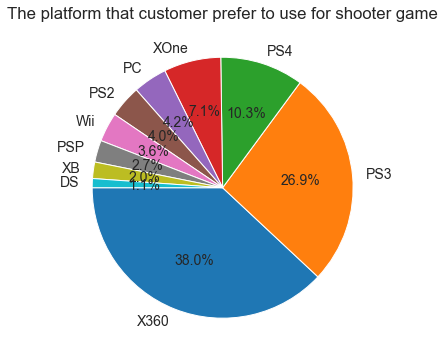

In [41]:
plt.figure(figsize = (12,6))
plt.title('The platform that customer prefer to use for shooter game')
plt.pie(prefer_platform_shooter_percentage, labels = prefer_platform_shooter_percentage.index , autopct = '%1.1f%%' ,startangle = 180);

From the chart above,it can be deduced that there is 38% user like Xbox360 , which rank the first one , to play shooter game.
The second and third platform prefer is PS3 and PS4 respectively.

#### Q4: What is the trend of sport game sales among players?

In [42]:
years_genre_globalsales = video_game_sales_modified[['Year','Genre','Global_Sales']]
years_genre_globalsales

,Year,Genre,Global_Sales
0,2006,Sports,82.74
2,2008,Racing,35.82
3,2009,Sports,33.00
6,2006,Platform,30.01
7,2006,Misc,29.02
...,...,...,...
16589,2016,Action,0.01
16590,2007,Role-Playing,0.01
16592,2008,Simulation,0.01
16595,2008,Racing,0.01


In [43]:
sport_years_globalsales = years_genre_globalsales[years_genre_globalsales.Genre == 'Sports']
sport_years_globalsales

,Year,Genre,Global_Sales
0,2006,Sports,82.74
3,2009,Sports,33.00
13,2007,Sports,22.72
14,2009,Sports,22.00
77,2015,Sports,8.49
...,...,...,...
16558,2007,Sports,0.01
16576,2016,Sports,0.01
16578,2011,Sports,0.01
16581,2011,Sports,0.01


In [44]:
sport_years_globalsales_modified = sport_years_globalsales[['Year','Global_Sales']]
sport_years_globalsales_modified

,Year,Global_Sales
0,2006,82.74
3,2009,33.00
13,2007,22.72
14,2009,22.00
77,2015,8.49
...,...,...
16558,2007,0.01
16576,2016,0.01
16578,2011,0.01
16581,2011,0.01


In [45]:
trend_of_sports_game = sport_years_globalsales_modified.groupby('Year')['Global_Sales'].sum()
trend_of_sports_game

Year
2005     59.54
2006    136.16
2007     98.20
2008     95.34
2009    138.52
2010     92.53
2011     56.99
2012     30.93
2013     41.55
2014     46.66
2015     41.54
2016     14.60
Name: Global_Sales, dtype: float64

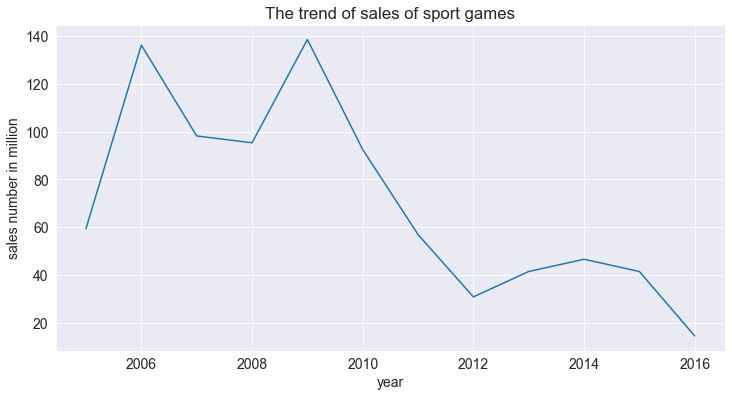

In [46]:
plt.figure(figsize = (12,6))
plt.title('The trend of sales of sport games')
plt.ylabel('sales number in million')
plt.xlabel('year')
plt.plot(trend_of_sports_game);

From the chart above,we can claim that the general trend of sales of sports game in market is decreasing. Although the trend has some part of increasing like in 2005-2006, 2008-2009 and 2012-2014.However, it shows overall decreasing from around 59 millions in 2006 to 14 millions in 2016.We can deduce the sports game demand have been decreased in recent years and less popular among globe.

## Inferences and Conclusion

We have drawn a number of inferences from the dataset.Here is a summary of a few of them:

* During 2005-2020, Nindento is the most competitive publisher againest Electronic Arts and Activision which rank at second and third respectively.


* Regarding the platform that customers have most, many customers and users also have XBox360,wii and PS3 at their home and buy the games with corresponding platform.


* Regarding the favourite of the type of game, customers and players prefer to play Action game, next is sports game and the third is shooter game.


* In the specific type of game - Action, Take Two Interactive dominates the market of action games,the second big influence on market is Ubisoft, the third is Warner Bros.Interactive Entertainment.


* In recent year 2016-2020, the first and the most popular platform is PS4 ,the second and the third are XBox360 and 3DS respectively.


* For playing shooter game, the players prefer to use XBox360 for shooting, rank at first.The second one is PS3 ,then the third one is for PS4.


* Although the sport game are popular among players, there is evidence show that the sales for sports type game has been going downhill. The demanding maybe less than as before.

In [6]:
project_name = "data-analysis-project"

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

In [51]:
jovian.submit(assignment="zero-to-pandas-project")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sinchunsimon/zerotopandas-course-project-starter" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/sinchunsimon/zerotopandas-course-project-starter
[jovian] Submitting assignment..
[jovian] Verify your submission at https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
